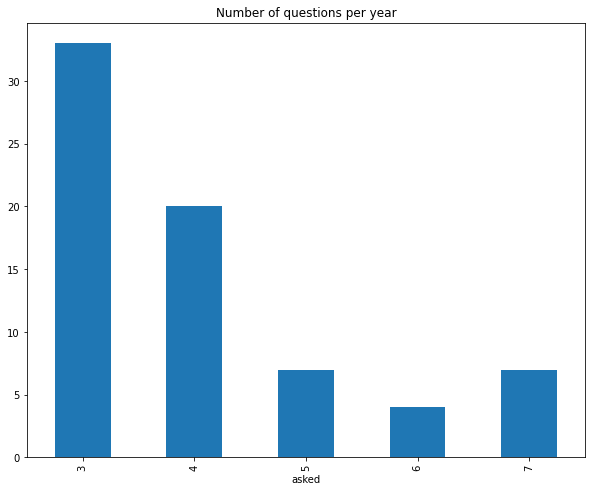

71


In [4]:
import pandas as pd
import matplotlib 
df = pd.read_json('../Data/covid.json')
df['asked'] = pd.to_datetime(df['asked'],utc= True)
import matplotlib.pyplot as plt
trend_of_questions = df['title'].groupby([df.asked.dt.month]).agg('count')
trend_of_questions.plot(x='asked', y='answer_count', kind ='bar', figsize=(10,8))
plt.title('Number of questions per year')
plt.savefig('./figures/number_of_question_per_year.png', bbox_inches='tight')
plt.show()

